In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the csv file and putting it into 'df' object.
components = pd.read_csv('components.csv')

In [5]:
components.head()

component sub_component
0  Purchasing        Orders
1  Purchasing      Invoices
2  Purchasing       Vendors
3  Purchasing       History
4  Purchasing     Worksheet

In [6]:

Defects = pd.read_csv('Jira_bugs_nbo.csv',encoding = 'ISO-8859-15')


In [7]:
Defects

Summary  \
0                                                  When   
1     READY TO GROOM:When choosing a recipe to copy ...   
2     Mouse click doesn't populate suggested order q...   
3     Changing an MSP End Date prevented by site wit...   
4              Post Production Save - Slow performance    
...                                                 ...   
2623  Validation for the unique Standard Item Cost D...   
2624  Windows 10 NBOA Deployment - URL rewrite issue...   
2625  SqlDateTime overflow exception on log in to No...   
2626  BOM: Manage User: Incorrect Tooltip is displaying   
2627  NBOA-WS: SiteItemStandardCosts table records a...   

     Custom field (Customer Description)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
...                                  ...   
2623                                 NaN   
2624                                 NaN   
2625                                 NaN   
2626                                 NaN   
2627                                 NaN   

     Custom field (Customer Facing Description)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
2623                                        NaN   
2624                                        NaN   
2625                                        NaN   
2626                                        NaN   
2627                                        NaN   

              Custom field (Customer Facing Next Steps)  \
0                                                   NaN   
1     Incident details/steps reviewed & assigned to ...   
2                                                   NaN   
3                                             In review   
4     Incident details/steps reviewed & assigned to ...   
...                                                 ...   
2623                                                NaN   
2624                                                NaN   
2625                                                NaN   
2626                                                NaN   
2627                                                NaN   

     Custom field (Customer Next Steps Update)  \
0                                          NaN   
1                        2020-09-23 08:15:25.0   
2                                          NaN   
3                        2020-09-18 11:25:53.0   
4                        2020-09-18 09:09:20.0   
...                                        ...   
2623                                       NaN   
2624                                       NaN   
2625                                       NaN   
2626                                       NaN   
2627                                       NaN   

                                            Description  \
0     # BOS Create a PO with SAUSAGE PATTY & VEGGIE ...   
1     *Affects Version:* 20.4.2.114 & 20.7.8.19\r\n\...   
2     Dev 1\r\n\r\nQA 1\r\nh1. Acceptance Criteria\r...   
3     DB Back up = DALMLSQL5  - ML_SodexoDrive_PRD_2...   
4     *Affects Version:* 20.4.2.114\r\n\r\n*Descript...   
...                                                 ...   
2623  In BOM on the Item Lookup screen the Date rang...   
2624  URL rewrite cannot be installed as a part of t...   
2625  Versions reproduced in: \r\n* 17.1.17\r\n* 16....   
2626  Incorrect Tooltip is displaying for External U...   
2627  When the Raw item with Standard item cost defi...   

      Custom field (Detailed Description) Custom field (Fix Description)  \
0                                     NaN                            NaN   
1                         

In [8]:
Defects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 10 columns):
Summary                                       2628 non-null object
Custom field (Customer Description)           43 non-null object
Custom field (Customer Facing Description)    4 non-null object
Custom field (Customer Facing Next Steps)     62 non-null object
Custom field (Customer Next Steps Update)     60 non-null object
Description                                   2628 non-null object
Custom field (Detailed Description)           0 non-null float64
Custom field (Fix Description)                13 non-null object
Custom field (Steps to reproduce)             1530 non-null object
Custom field (Steps to verify fix)            18 non-null object
dtypes: float64(1), object(9)
memory usage: 205.4+ KB


In [9]:
Defects = Defects.fillna("")

In [10]:
Defects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 10 columns):
Summary                                       2628 non-null object
Custom field (Customer Description)           2628 non-null object
Custom field (Customer Facing Description)    2628 non-null object
Custom field (Customer Facing Next Steps)     2628 non-null object
Custom field (Customer Next Steps Update)     2628 non-null object
Description                                   2628 non-null object
Custom field (Detailed Description)           2628 non-null object
Custom field (Fix Description)                2628 non-null object
Custom field (Steps to reproduce)             2628 non-null object
Custom field (Steps to verify fix)            2628 non-null object
dtypes: object(10)
memory usage: 205.4+ KB


In [11]:
list_columns = Defects.columns.to_list()

In [12]:
for i in range(len(list_columns)-1):
    Defects['Total_string'] =  Defects[list_columns[i]]+Defects[list_columns[i+1]]

In [13]:
Defects['Total_string']

0                                                        
1                                                \r\n\r\n
2                                                        
3                                                        
4                                                \r\n\r\n
                              ...                        
2623                                                     
2624                                                     
2625    1.\tEnable Cycle Menus GUI-less settings for a...
2626                                                     
2627    * Delete raw item with standard item cost via ...
Name: Total_string, Length: 2628, dtype: object

In [14]:
component_list = components['component'].value_counts().index.to_list()

In [15]:
component_list

['Payroll',
 'Recipes',
 'Employees',
 'Sales',
 'Purchasing',
 'Manager Tools',
 'Staffing',
 'Inventory and Prep',
 'Scheduling',
 'Period End',
 'Reports']

In [16]:
for i in component_list:
    Defects[i] = Defects['Total_string'].str.contains(i, regex=False)

In [17]:
filtered_df = Defects[['Employees',
       'Recipes', 'Payroll', 'Purchasing', 'Scheduling', 'Manager Tools',
       'Staffing', 'Inventory and Prep', 'Sales', 'Period End', 'Reports']]

In [18]:
for i in filtered_df.columns.to_list():
    filtered_df[i] = filtered_df[i]*1

In [19]:
Defects[Defects['Employees']==1]['Description'].iloc[1]


'GEMS # Â\xa0Â\xa096681680\r\n\r\nDescription of Issue:\r\n\r\nWhen deactivating old employees at the Phoenixville or Wilmington sites, they get a â\x80\x9cfailed to enable constraintsâ\x80\x9d error.Â\xa0\r\n\r\nThese 2 sites imported employees back in 2006-ish from Aloha? but never truly used it.Â\xa0 We are now in the process of implementing the labor piece and are trying to clean up these old employees.Â\xa0\r\n\r\nÂ\xa0\r\n\r\nDescription of investigation that has already been performed:\r\n\r\nWe were not able to recreate the issue in a scrubbed backup.\r\n\r\nPlease advise on:\r\n * What fields are minimally required on an Employee Profile?\r\n * Are there illegal characters that are not allowed in an Employee Profile?\r\n\r\nÂ\xa0\r\n\r\nSites Affected:Â\xa0Â\xa0Â\xa0 the Phoenixville or Wilmington sites\r\n\r\nÂ\xa0\r\n\r\nCustomer Version NBO:Â\xa0Â\xa0Â\xa0Â\xa0 17.7.2.266'

In [20]:
list_x=[]
list_y=[]
for i in filtered_df.columns.to_list():
    list_x.append( filtered_df[i].value_counts().iloc[0])
    list_y.append(filtered_df[i].value_counts().iloc[1])

In [21]:
 filtered_df['Employees'].value_counts()

0    2543
1      85
Name: Employees, dtype: int64

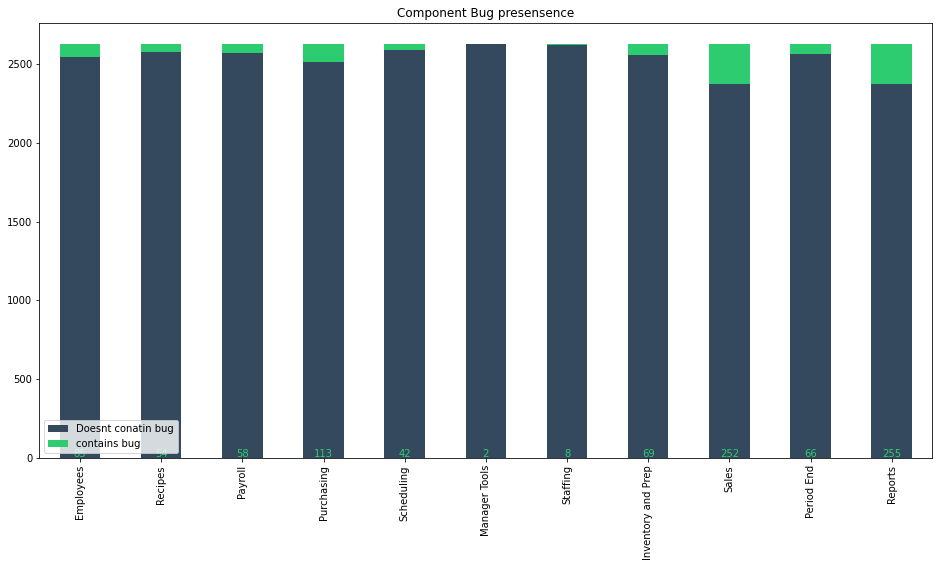

In [22]:
false_list = list_x
true_list = list_y
index = filtered_df.columns.to_list()
df = pd.DataFrame({'Doesnt conatin bug': false_list,
                   'contains bug': true_list}, index=index)
col = sns.color_palette("hls", 11)
color_map = [ "#34495e", "#2ecc71"]
#for index, value in enumerate(y):
#plt.text(2, 1, str(2))

ax = df.plot.bar(stacked=True,colors  = color_map,figsize=(16,8),title="Component Bug presensence")
for i,j in enumerate(df['contains bug'].to_list()) :
    ax.text(i,10, j, ha='center',color = "#2ecc71")


In [23]:
df['contains bug'].to_list()

[85, 54, 58, 113, 42, 2, 8, 69, 252, 66, 255]

# From the graph above its clear that most of the bugs are from sales and reports components
# but which component has more report bugs? 

In [24]:
list_compmax_report = []
for i in filtered_df.columns.to_list():
    print(i,filtered_df[(filtered_df[i]==1) & (filtered_df['Reports']==1)].shape[0])
    list_compmax_report.append(filtered_df[(filtered_df[i]==1) & (filtered_df['Reports']==1)].shape[0])

Employees 18
Recipes 11
Payroll 25
Purchasing 18
Scheduling 16
Manager Tools 0
Staffing 0
Inventory and Prep 12
Sales 34
Period End 13
Reports 255


In [25]:
list_compmax_report.remove(list_compmax_report[-1])

In [26]:
tupled_list=[]
for i in list_compmax_report:
    tupled_list.append(i/100)
#tupled_list.remove(tupled_list[-1])    
tupled_list = tuple(tupled_list)  


In [27]:
list_col = filtered_df.columns.to_list()
list_col.remove(list_col[-1])

In [28]:
list_col

['Employees',
 'Recipes',
 'Payroll',
 'Purchasing',
 'Scheduling',
 'Manager Tools',
 'Staffing',
 'Inventory and Prep',
 'Sales',
 'Period End']

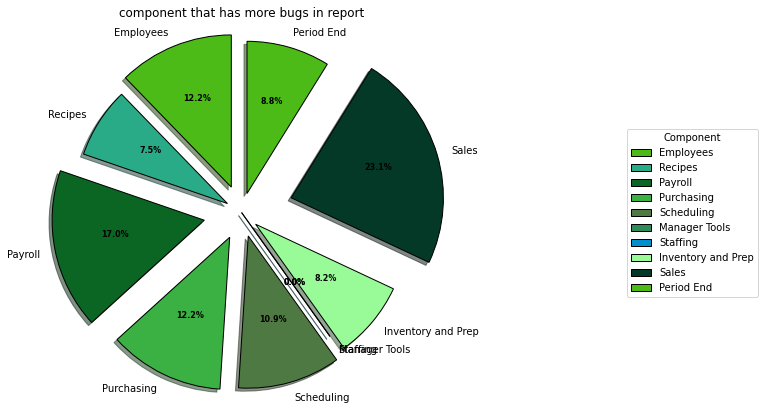

In [29]:

  
  
# Creating dataset 
cars =  list_col
  
data = list_compmax_report
  
  
# Creating explode data 
explode = tupled_list
  
# Creating color parameters 
colors = ( "#4CBB17", "#29AB87", "#0B6623", 
          "#3BB143", "#4F7942", "#2E8B57",
          "#008ECC","#98FB98","#043927") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = cars, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, cars, 
          title ="Component", 
          loc ="center left", 
          bbox_to_anchor =(1.5, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("component that has more bugs in report") 
  
# show plot 
plt.show() 

In [30]:
Defects_prio_sever = pd.read_csv('new_bug_report.csv',encoding = 'ISO-8859-15')


In [31]:
filtered_df['Priority'] = Defects_prio_sever['Priority']
filtered_df['severity'] = Defects_prio_sever['Custom field (Severity)']

In [32]:
filtered_df[(filtered_df['Employees']==1)&(filtered_df['Period End']==1)& (filtered_df['Payroll']==1)]

Employees  Recipes  Payroll  Purchasing  Scheduling  Manager Tools  \
823          1        0        1           0           0              0   
839          1        0        1           0           0              0   

     Staffing  Inventory and Prep  Sales  Period End  Reports Priority  \
823         0                   0      0           1        1       P1   
839         0                   0      0           1        1       P1   

    severity  
823       S3  
839       S3

# bugs that span oveer multiple componenets

In [33]:
for i in filtered_df.columns.to_list():
    for j in filtered_df.columns.to_list():
        if filtered_df[(filtered_df[i]==1) & (filtered_df[j]==1)].shape[0] >0:
            print(i,j,filtered_df[(filtered_df[i]==1) & (filtered_df[j]==1)].shape[0])

Employees Employees 85
Employees Payroll 14
Employees Scheduling 3
Employees Period End 10
Employees Reports 18
Recipes Recipes 54
Recipes Inventory and Prep 6
Recipes Sales 8
Recipes Period End 6
Recipes Reports 11
Payroll Employees 14
Payroll Payroll 58
Payroll Scheduling 3
Payroll Manager Tools 2
Payroll Staffing 3
Payroll Sales 1
Payroll Period End 4
Payroll Reports 25
Purchasing Purchasing 113
Purchasing Inventory and Prep 8
Purchasing Sales 18
Purchasing Period End 3
Purchasing Reports 18
Scheduling Employees 3
Scheduling Payroll 3
Scheduling Scheduling 42
Scheduling Staffing 7
Scheduling Sales 3
Scheduling Reports 16
Manager Tools Payroll 2
Manager Tools Manager Tools 2
Manager Tools Sales 1
Staffing Payroll 3
Staffing Scheduling 7
Staffing Staffing 8
Staffing Sales 4
Inventory and Prep Recipes 6
Inventory and Prep Purchasing 8
Inventory and Prep Inventory and Prep 69
Inventory and Prep Sales 5
Inventory and Prep Period End 4
Inventory and Prep Reports 12
Sales Recipes 8
Sales P

In [34]:
import seaborn as sb
#heat_map = sb.heatmap(filtered_df[filtered_df['Employees']==1])
#heat_map = sb.heatmap(filtered_df[filtered_df['Employees']==1].corr())
plt.figure(figsize=(15,10))
heat_map = sb.heatmap(filtered_df.corr(),cmap="YlGn",annot=True,cbar_kws={'label': 'Intensity of corelation', 'orientation': 'vertical'})
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
heat_map.set_xticklabels(heat_map.get_yticklabels(), rotation=40)

plt.show()

<Figure size 1440x1440 with 0 Axes>

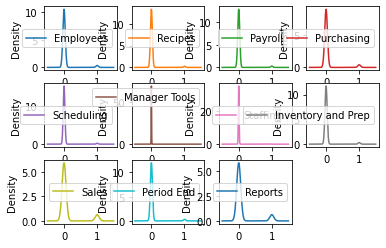

In [35]:
# Univariate Density Plots
import matplotlib.pyplot as plt
import pandas

#names = 
data = filtered_df
plt.figure(figsize=(20,20))
data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)
plt.show()

In [36]:
def all_values_exists(col,imp,encoded_list,max_len):
    list_pro = filtered_df[filtered_df[col]==1][imp].value_counts()[encoded_list].to_list()
    if len(list_pro)<5:
        length =max_len - len(list_pro)
        index = len(list_pro)
        for i in range(index,max_len):
            list_pro.append(0)
    #print(list_pro)        
    return list_pro        
col = filtered_df[filtered_df.columns[~filtered_df.columns.isin(['Priority','severity'])]].columns.to_list()
   
list_pro_sever=[]
for j in filtered_df[filtered_df.columns[~filtered_df.columns.isin(['Priority','severity'])]].columns.to_list():                 
        list_pro_sever.append(all_values_exists(j,'Priority',['P1','P2','P3','P4','Not Set'],5))



In [37]:
def conv_float_nan(list_of_list):
    for i in list_of_list:
        for j in range(len(i)):
            if str(i[j]) == 'nan' :

                i[j]=0            
            if (type(i[j]) == type(2.2))  and   (str(i[j]) != 'nan'):
                i[j] = int(i[j])
    return (list_of_list)      

In [38]:
  
res = {col[i]: list_pro_sever[i] for i in range(len(conv_float_nan(list_pro_sever)))} 
print(res)

{'Employees': [12, 27, 27, 18, 1], 'Recipes': [6, 20, 25, 1, 2], 'Payroll': [2, 22, 26, 3, 5], 'Purchasing': [7, 22, 64, 14, 6], 'Scheduling': [1, 9, 26, 6, 0], 'Manager Tools': [0, 1, 0, 0, 1], 'Staffing': [0, 3, 5, 0, 0], 'Inventory and Prep': [7, 14, 34, 12, 2], 'Sales': [31, 84, 105, 23, 9], 'Period End': [7, 18, 33, 8, 0], 'Reports': [23, 80, 114, 34, 4]}


Employees


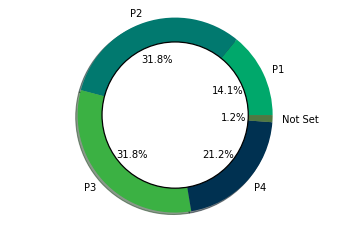

Recipes


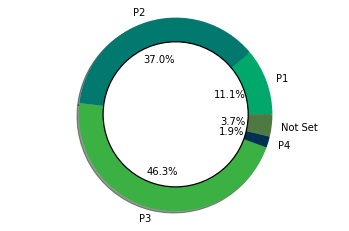

Payroll


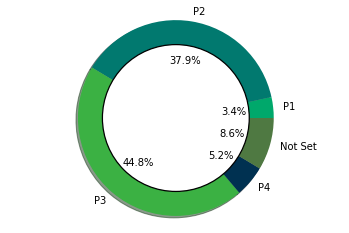

Purchasing


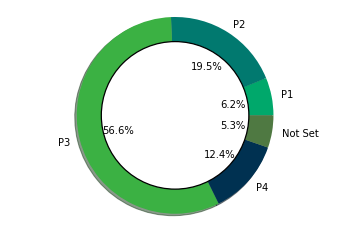

Scheduling


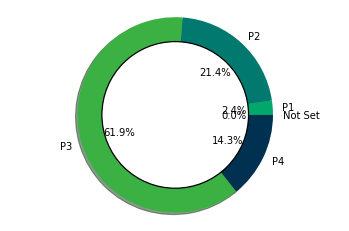

Manager Tools


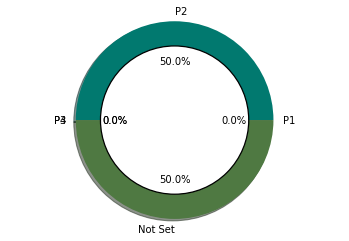

Staffing


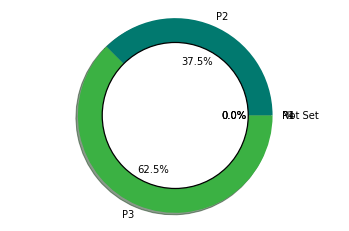

Inventory and Prep


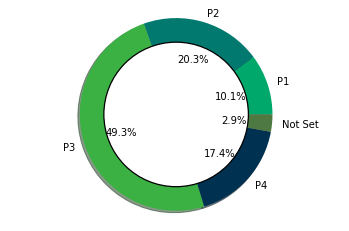

Sales


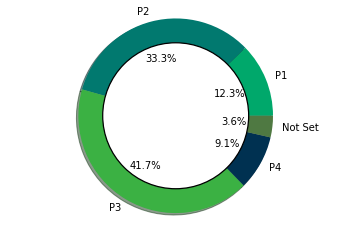

Period End


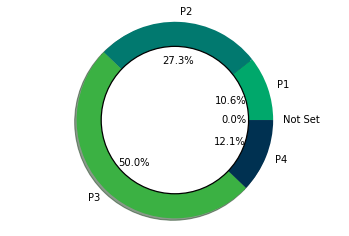

Reports


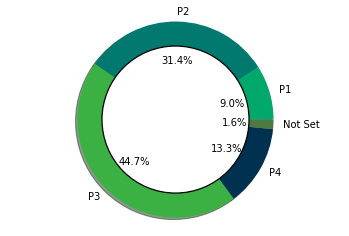

In [39]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels =["P1","P2","P3","P4","Not Set"]
#sizes = res['Employees']
#colors = [ '#FF0090','gold', '#3BB143','#FC6600', 'red']

colors = [ '#00A86B', '#01796F','#3BB143', '#003151','#4f7942']

#plt.subplots(3,4)
explode = (0, 0, 0, 0,0)  # explode a slice if required
for i,j in res.items():
    print(i)
    plt.pie(j, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

In [40]:
filtered_df['severity'].value_counts()

S3    918
S2    875
S4    602
S1    233
Name: severity, dtype: int64

In [41]:
list_pro_sever=[]
for j in filtered_df[filtered_df.columns[~filtered_df.columns.isin(['Priority','severity'])]].columns.to_list():                 
        list_pro_sever.append(all_values_exists(j,'severity',["S1","S2","S3","S4"],4))
list_pro_sever

[[7, 30, 25, 23],
 [3, 23, 15, 13],
 [nan, 27.0, 18.0, 13.0],
 [4, 34, 28, 47],
 [3, 11, 13, 15],
 [nan, 1.0, 1.0, nan],
 [nan, 7.0, nan, 1.0],
 [3, 17, 21, 28],
 [17, 108, 70, 57],
 [nan, 35.0, 15.0, 16.0],
 [11, 103, 82, 59]]

In [42]:
  
res = {col[i]: list_pro_sever[i] for i in range(len(conv_float_nan(list_pro_sever)))} 
print(res)

{'Employees': [7, 30, 25, 23], 'Recipes': [3, 23, 15, 13], 'Payroll': [0, 27, 18, 13], 'Purchasing': [4, 34, 28, 47], 'Scheduling': [3, 11, 13, 15], 'Manager Tools': [0, 1, 1, 0], 'Staffing': [0, 7, 0, 1], 'Inventory and Prep': [3, 17, 21, 28], 'Sales': [17, 108, 70, 57], 'Period End': [0, 35, 15, 16], 'Reports': [11, 103, 82, 59]}


Employees


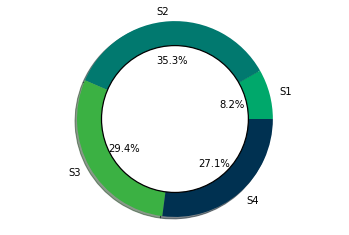

Recipes


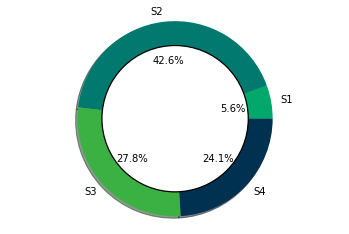

Payroll


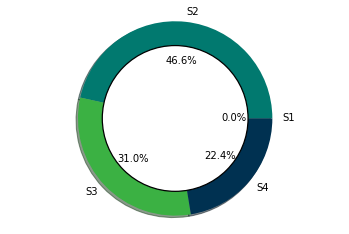

Purchasing


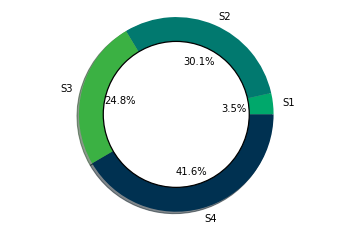

Scheduling


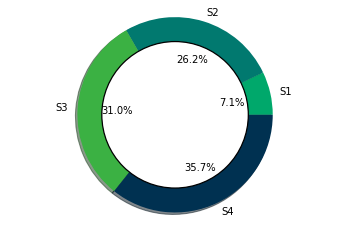

Manager Tools


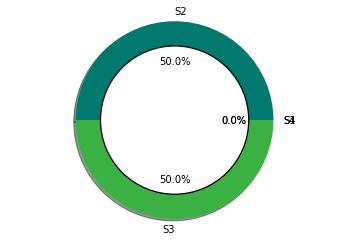

Staffing


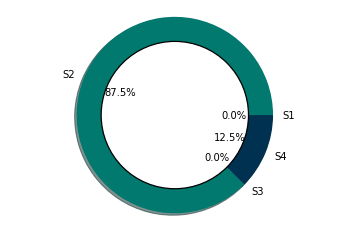

Inventory and Prep


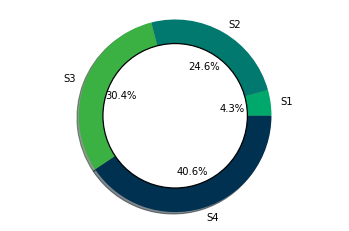

Sales


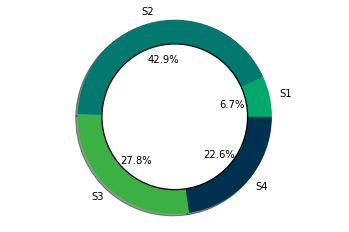

Period End


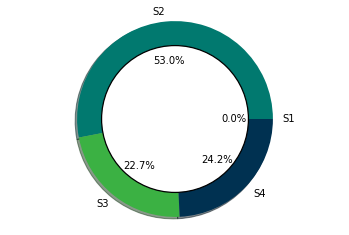

Reports


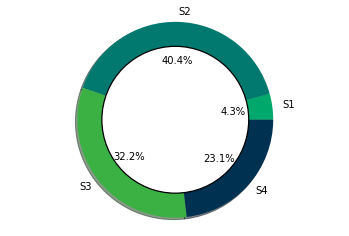

In [43]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels =["S1","S2","S3","S4"]
#sizes = res['Employees']
colors = [ '#00A86B', '#01796F','#3BB143', '#003151']
#plt.subplots(3,4)
explode = (0, 0, 0, 0)  # explode a slice if required
for i,j in res.items():
    print(i)
    plt.pie(j, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

In [44]:
Defects_time_taken = pd.read_csv('nbo_defectstime.csv',encoding = 'ISO-8859-15')

In [45]:
Defects_time_taken['Summary'].iloc[1]

'Standard Item Cost End Date in Date Range set to date in past'

In [46]:
Defects_time_taken.drop([1], inplace=True)
Defects_time_taken = Defects_time_taken.reset_index(drop=True)

In [47]:
for i in range(Defects_time_taken['Summary'].shape[0]):
        #pltprint(Defects_time_taken['Summary'].iloc[i])
        #print(Defects['Summary'].iloc[i])
        if(Defects_time_taken['Summary'].iloc[i]!=Defects['Summary'].iloc[i]):
     
            print(i,Defects_time_taken['Summary'].iloc[i])
            

In [48]:
col_index = Defects_time_taken[(Defects_time_taken['Resolved'].isnull()==True) & (Defects_time_taken['Created'].notnull()==True)].index.to_list()

In [49]:
for i in col_index:
    Defects_time_taken['Resolved'].iloc[i] =Defects_time_taken['Created'].iloc[i]

In [50]:
filtered_df['Resolved'] = Defects_time_taken['Resolved']

In [51]:
filtered_df['Created'] = Defects_time_taken['Created']

In [52]:
filtered_df['Days_taken_To_resolve'] = (pd.to_datetime(filtered_df['Resolved'])-  pd.to_datetime(filtered_df['Created']))/np.timedelta64(1, 'D')

In [53]:
filtered_df['Days_taken_To_resolve']

0        0.027083
1        0.000000
2        0.525694
3        0.000000
4        0.000000
          ...    
2623    66.460417
2624    25.106250
2625    36.137500
2626    48.045139
2627    32.886111
Name: Days_taken_To_resolve, Length: 2628, dtype: float64

In [54]:
columns_df = filtered_df.columns.to_list()
columns_df = columns_df[0:11]

In [55]:
for i in columns_df:
        print(i)
        print(max(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()))
        print(min(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()))
        print(sum(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list())/len(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()))

Employees
597.7534722222222
0.0
56.21504901960786
Recipes
284.6791666666667
0.22152777777777777
31.16216563786008
Payroll
208.44791666666666
0.0
32.352777777777774
Purchasing
343.07916666666665
0.0
31.805998033431656
Scheduling
420.2
0.0
33.522503306878306
Manager Tools
90.83055555555555
32.795833333333334
61.81319444444444
Staffing
77.97222222222223
13.854166666666666
28.724392361111107
Inventory and Prep
185.71458333333334
0.0
35.70568639291466
Sales
471.09583333333336
0.0
34.33062169312171
Period End
431.8881944444444
0.003472222222222222
40.03148148148149
Reports
407.10625
0.0
40.50810185185186


85

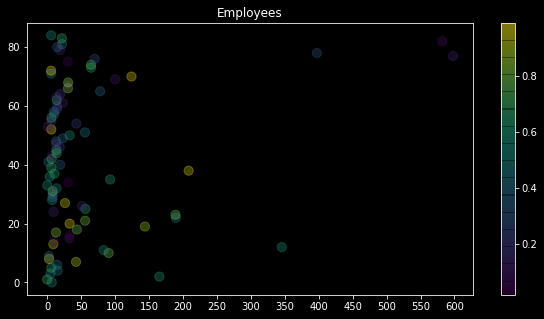

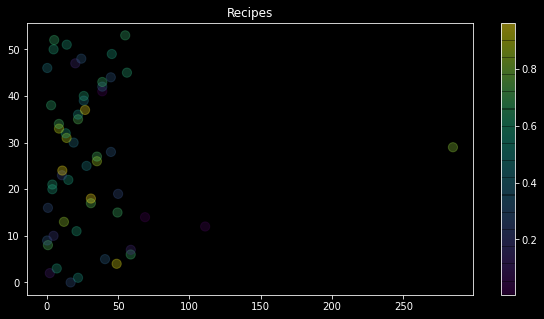

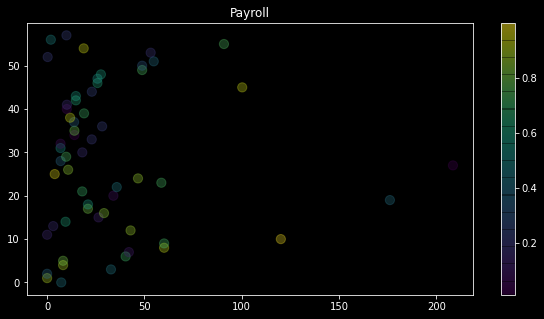

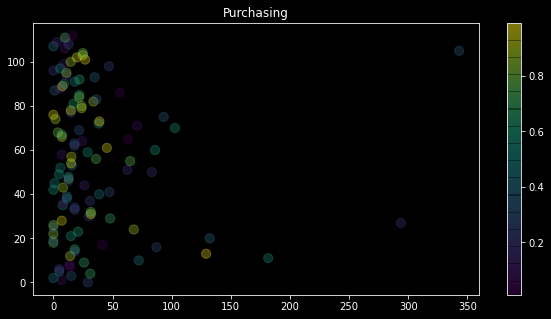

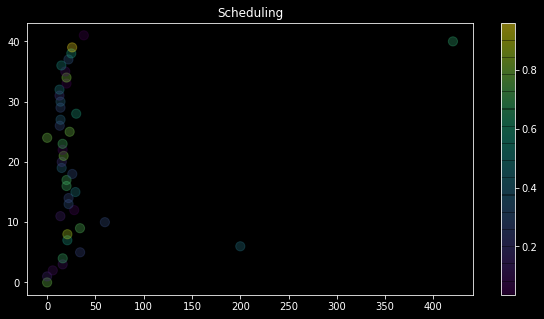

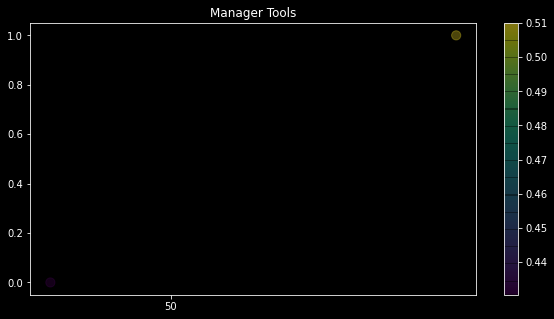

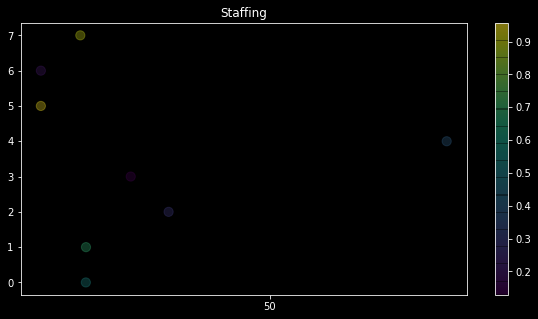

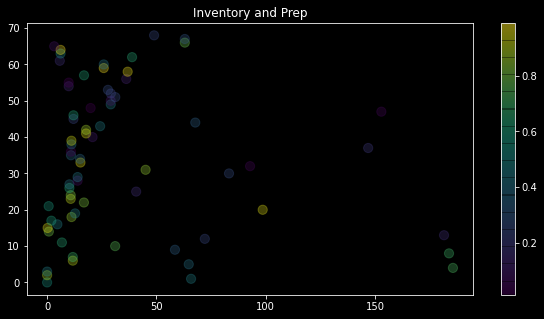

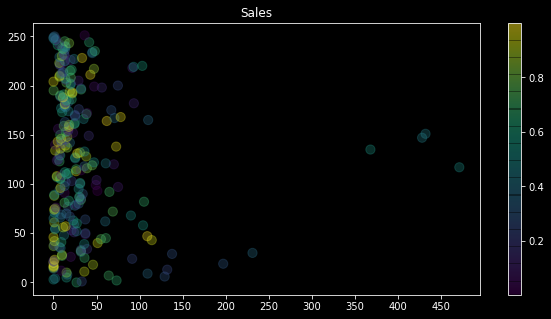

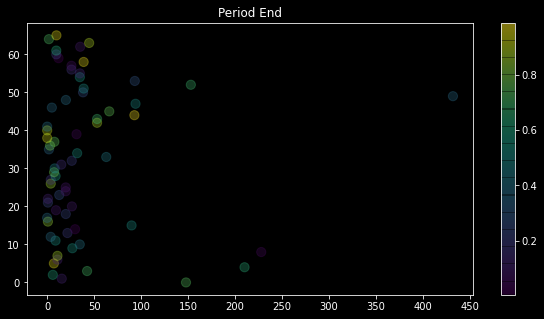

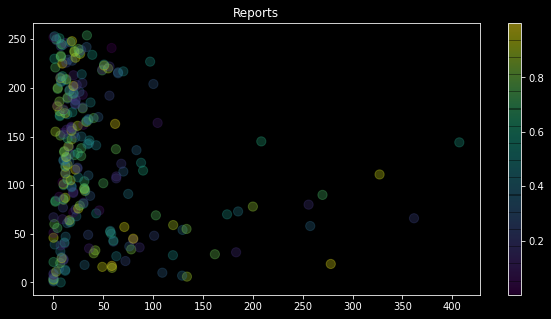

In [66]:
rng = np.random.RandomState(0)
for i in columns_df:
        plt.style.use('dark_background')

        x = filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()
        y = [i for i in range(0,len(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()))]
        colors = rng.rand(len(filtered_df[filtered_df[i]==1]['Days_taken_To_resolve'].to_list()))
       # sizes = 100 * rng.rand(100)
        sizes = 85
        plt.figure(figsize=(10,5))
        plt.xticks([j for j in range(0,601,50)])
        plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
        
        plt.title(i)
        plt.colorbar()
        plt.savefig("C://Users//sm185567//Pictures//img//"+ i +".png")

In [67]:
filtered_df.columns.to_list()

['Employees',
 'Recipes',
 'Payroll',
 'Purchasing',
 'Scheduling',
 'Manager Tools',
 'Staffing',
 'Inventory and Prep',
 'Sales',
 'Period End',
 'Reports',
 'Priority',
 'severity',
 'Resolved',
 'Created',
 'Days_taken_To_resolve']

In [68]:
filtered_df[filtered_df.Days_taken_To_resolve== 786.40625]

Employees  Recipes  Payroll  Purchasing  Scheduling  Manager Tools  \
1796          0        0        0           0           0              0   

      Staffing  Inventory and Prep  Sales  Period End  Reports Priority  \
1796         0                   0      0           0        0       P3   

     severity           Resolved            Created  Days_taken_To_resolve  
1796       S3  22/Nov/19 2:42 PM  27/Sep/17 4:57 AM              786.40625

In [69]:
Defects['Summary'].loc[1796]

'SiteItemsAsRaw: Timeout exception on deleting items from CK catalog'

In [70]:
max(filtered_df[filtered_df['Sales']==1]['Days_taken_To_resolve'])

471.09583333333336

In [71]:
(filtered_df[filtered_df['Days_taken_To_resolve']==0.0].shape[0]/filtered_df.shape[0])*100

2.43531202435312

In [72]:
filtered_df[(filtered_df['Sales']==1) & (filtered_df['Days_taken_To_resolve']==471.09583333333336)]

Employees  Recipes  Payroll  Purchasing  Scheduling  Manager Tools  \
1085          0        0        0           0           0              0   

      Staffing  Inventory and Prep  Sales  Period End  Reports Priority  \
1085         0                   0      1           0        0       P4   

     severity            Resolved            Created  Days_taken_To_resolve  
1085       S4  19/Dec/19 12:08 PM  04/Sep/18 9:50 AM             471.095833

In [73]:
Defects['Summary'].loc[1085]

'Menu Plan Day part Override disabled upon save of a new menu plan'

In [74]:
filtered_df.shape[0]

2628

In [75]:
filtered_df[filtered_df['Days_taken_To_resolve']>=100.0]['Priority'].value_counts()

P4         157
P3         122
P2          55
Not Set     18
P1          12
Name: Priority, dtype: int64

In [76]:
filtered_df[filtered_df['Days_taken_To_resolve']>=100.0]['severity'].value_counts()

S3    195
S4     81
S2     80
S1      8
Name: severity, dtype: int64

In [77]:
filtered_df[filtered_df['Days_taken_To_resolve']>=100.0].shape[0]/filtered_df.shape[0]

0.1385083713850837

In [78]:
filtered_df[(filtered_df['Recipes']==1) & (filtered_df['Inventory and Prep']==1)]

Employees  Recipes  Payroll  Purchasing  Scheduling  Manager Tools  \
579           0        1        0           0           0              0   
582           0        1        0           0           0              0   
596           0        1        0           0           0              0   
2191          0        1        0           0           0              0   
2192          0        1        0           0           0              0   
2215          0        1        0           0           0              0   

      Staffing  Inventory and Prep  Sales  Period End  Reports Priority  \
579          0                   1      0           0        0       P1   
582          0                   1      0           0        0       P1   
596          0                   1      0           0        0       P1   
2191         0                   1      0           1        0       P3   
2192         0                   1      0           1        0       P3   
2215         0                   1      0           1        0       P3   

     severity            Resolved             Created  Days_taken_To_resolve  
579        S2  25/Jun/19 12:32 PM   24/Jun/19 5:39 PM               0.786806  
582        S2   24/Jun/19 5:23 PM  24/Jun/19 12:04 PM               0.221528  
596        S2  23/Jun/19 11:13 AM   18/Jun/19 6:15 PM               4.706944  
2191       S4  22/May/17 12:11 PM   26/Apr/17 2:24 PM              25.907639  
2192       S4  22/May/17 12:19 PM   26/Apr/17 2:23 PM              25.913889  
2215       S4  22/May/17 12:12 PM   13/Apr/17 3:14 PM              38.873611

In [79]:
Defects['Summary'].loc[579]

'SCRIPT: Stores are noticing after the upgrade WASTE is not calculating cost on Menu Items and Prep'

In [80]:
Defects['Summary'].loc[582]

'Apply to 19.4.1: NBO 15105: Stores are noticing after the upgrade WASTE is not calculating cost on Menu Items and Prep'

In [81]:
Defects['Summary'].loc[596]

'Stores are noticing after the upgrade WASTE is not calculating cost on Menu Items and Prep'

In [82]:
Defects['Summary'].loc[2191]

'Apply to 15.4: NBO-2605: DEVPR:Replicated data not showing Standard Unit price in ST_WasteByRawMaterial correctly'

In [83]:
Defects['Summary'].loc[2215]

'DEVPR: Replicated data not showing Standard Unit price in ST_WasteByRawMaterial correctly'

In [84]:
df['Summary'] = Defects['Summary'].copy()

In [85]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df =Defects
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.Summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (500, 100), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [86]:
summary_list = df['Summary'].to_list()


In [87]:
for i in range(len(summary_list)):
   summary_list[i] = summary_list[i]+"Thanks"

In [88]:
df['Summary'] = pd.Series(summary_list) 

In [89]:
df['Summary'][1]

'READY TO GROOM:When choosing a recipe to copy - the Last User Modified column is displaying numbers instead of User NameThanks'